# Applied Data Analysis — Homework 5

Import common libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

## Task 1

> Generate a word cloud based on the raw corpus -- I recommend you to use the [Python word_cloud library](https://github.com/amueller/word_cloud).
With the help of `nltk` (already available in your Anaconda environment), implement a standard text pre-processing 
pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and
cons (if any) of the two word clouds you generated.

In [2]:
# Read the whole text.
df = pd.read_csv(path.join('hillary-clinton-emails', 'emails.csv'))
df.sample(5)

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
1418,1419,C05761131,STEINBERG,H2,"Abedin, Huma",81.0,2009-05-02T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/20_21_22/DOC_0...,F-2014-20439,...,NaN,NaN,NaN,NaN,F-2014-20439,C05761131,06/30/2015,RELEASE IN PART,"Abedin, Huma <AbedinH@state.gov>\r\nSaturday, ...",UNCLASSIFIED U.S. Department of State Case No....
7767,7768,C05776480,LATEST CON'T,H,"Sullivan, Jacob J",87.0,2010-12-02T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0111/DOC_0C0...,F-2014-20439,...,NaN,"Sullivan, Jacob J <Sullivann@state.gov>",NaN,"Thursday, December 2, 2010 7:09 AM",F-2014-20439,C05776480,08/31/2015,RELEASE IN FULL,Fyi,UNCLASSIFIED U.S. Department of State Case No....
566,567,C05758984,PALAU OFFENDED BY US POSITIONS,sullivanjj@state.gov,H,80.0,2009-07-12T04:00:00+00:00,2015-06-30T04:00:00+00:00,DOCUMENTS/HRCAll_1_1-29_JuneWEB/2_3_4/DOC_0C05...,F-2014-20439,...,'sullivanu@state.gov.,H <hrod17@clintonemail.com>,NaN,"Sunday, July 12, 2009 6:56 PM",F-2014-20439,C05758984,06/30/2015,RELEASE IN PART,"Jake---Pls review, do some recon outreach and ...",UNCLASSIFIED U.S. Department of State Case No....
4437,4438,C05768038,HOW LONG HBJ MTG GO?,H,"Abedin, Huma",81.0,2010-04-01T04:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0073/DOC_0C0...,F-2014-20439,...,NaN,"Abedin, Huma <AbedinH@state.gov>",NaN,"Thursday, April 1, 2010 5:36 PM",F-2014-20439,C05768038,08/31/2015,RELEASE IN PART,NaN,UNCLASSIFIED U.S. Department of State Case No....
3663,3664,C05766505,A COUPLE OF POWERFUL QUOTES FROM FOREIGN MEDIA...,H,McHaleJA@state.gov,105.0,2010-01-28T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0061/DOC_0C0...,F-2014-20439,...,"H; Burns, William J; Mills, Cheryl D; Smith, D...","McHale, Judith A <McHaleJA@state.gov>",NaN,"Thursday, January 28, 2010 5:07 AM",F-2014-20439,C05766505,08/31/2015,RELEASE IN FULL,Our Posts at work.,UNCLASSIFIED U.S. Department of State Case No....


In [3]:
len(df.index)

7945

In [4]:
df['ExtractedBodyText'].count()

6742

Based on above computations we can see thats ExtractedBodyText is missing in about 1200 cases. Anyway, for the sake of simplicity we have decided to use this column instead of RawText which would require a big amount of preprocessing.

(-0.5, 399.5, 199.5, -0.5)

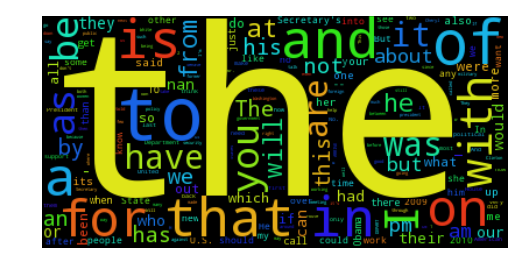

In [5]:
from collections import Counter
result = Counter(" ".join(df['ExtractedBodyText'].apply(str).tolist()).split(" ")).most_common()
wordcloud = WordCloud().generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

We have generated wordcloud on the word frequencies form raw data witouth any preprocessing. Unsurprisingly, the word cloud consists of the most common words in English, be it articles, prepositions, pronouns and forms of verb is.

(-0.5, 399.5, 199.5, -0.5)

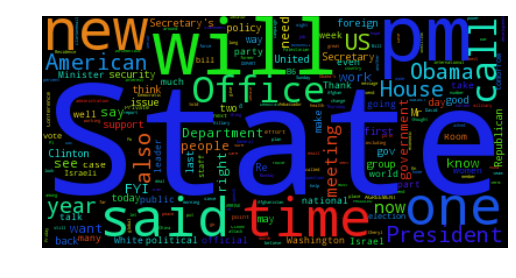

In [6]:
text = df['ExtractedBodyText'].str.cat(sep=' ')
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

Here, we have generated word cloud from the raw text, but we let the worldcloud library to count the frequencies itself. The library has its own set of preprocessing steps such as removing stopwords, numbers as well as simple tokenization. Therefore, we can see that most of the basic common words in English language got filtered out.

#### Our  text pre-processing pipeline

Internet sources (http://www.nytimes.com/2008/12/03/us/politics/03clinton.html?_r=0) claim that Hillary Rodham Clinton is monolingual, i.e. she speaks only English. That is why we assume that all the emails written to and by her are in English.

In [7]:
tokens = nltk.word_tokenize(text)
tokens[:25]

['B6',
 'Thursday',
 ',',
 'March',
 '3',
 ',',
 '2011',
 '9:45',
 'PM',
 'H',
 ':',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 '...',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding']

In [8]:
#remove punctutation
tokens_wo_punctuation = [token for token in tokens if token not in ['.', ',', '!', '?', ':', '-', '&', '<', '>', ';', '"', '@', '(', ')', "''", '``', '—', '--', "'", '[', ']', '•', '%', '...', '-•-', '-^']]
tokens_wo_punctuation[:25]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9:45',
 'PM',
 'H',
 'Latest',
 'How',
 'Syria',
 'is',
 'aiding',
 'Qaddafi',
 'and',
 'more',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'hrc',
 'memo']

In [9]:
my_stopwords = stopwords.words('english')
my_stopwords.extend(["n't", 'pm'])
tokens_wo_stopwords = [token for token in tokens_wo_punctuation if token.lower() not in my_stopwords]
tokens_wo_stopwords[:25]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9:45',
 'H',
 'Latest',
 'Syria',
 'aiding',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 '030311.docx',
 'March']

In [10]:
# part of speech for token
tokens_tagged = nltk.pos_tag(tokens_wo_stopwords)
tokens_tagged[:25]

[('B6', 'NNP'),
 ('Thursday', 'NNP'),
 ('March', 'NNP'),
 ('3', 'CD'),
 ('2011', 'CD'),
 ('9:45', 'CD'),
 ('H', 'NNP'),
 ('Latest', 'NNP'),
 ('Syria', 'NNP'),
 ('aiding', 'VBG'),
 ('Qaddafi', 'NNP'),
 ('Sid', 'NNP'),
 ('hrc', 'NN'),
 ('memo', 'NN'),
 ('syria', 'NN'),
 ('aiding', 'VBG'),
 ('libya', 'JJ'),
 ('030311.docx', 'CD'),
 ('hrc', 'NN'),
 ('memo', 'NN'),
 ('syria', 'NN'),
 ('aiding', 'VBG'),
 ('libya', 'JJ'),
 ('030311.docx', 'CD'),
 ('March', 'NNP')]

We do not use stemming in this part of homework as we are interested in whole words. 

In [11]:
# mapping from POS_TAG to WordNet's part of speech (taken from http://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python)
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [12]:
lmtzr = WordNetLemmatizer()
def lemmatize(token, treebank_tag):
    wordnet_pos = get_wordnet_pos(treebank_tag)
    if wordnet_pos:
        return lmtzr.lemmatize(token, wordnet_pos), wordnet_pos
    else:
        return token, wordnet_pos

In [13]:
# lemmed_tokens = [lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged]
# lemmatize and filter out only parts of speech we are interested in (NOUNS< VERBS< ADJECTIVES, ADVERBS)
lemmed_tokens  = [lemmed_token for lemmed_token, wordnet_pos in (lemmatize(token, part_of_speech) for token, part_of_speech in tokens_tagged) if wordnet_pos is not None]
lemmed_tokens[:25]

['B6',
 'Thursday',
 'March',
 'H',
 'Latest',
 'Syria',
 'aid',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'March',
 'Hillary',
 'Thx',
 'H',
 'hrod17',
 'clintonemail.com']

We have moved normalization to the end of the pipeline because some of the methods used before are sensitive to dots and case. For example, if we used normalization on "U.S.", "u.s.", "US" all would result in "us", then nltk.pos_tag([token,]) method would mark it as personal pronoun (PRP) instead of noun (N*) and thus it would get filtered out. "u.s." gets tagged as Verb, non-3rd person singular present (VBP) which is incorect, but as we do not filter out verbs it does not cause any problems to our computations.

In [14]:
nltk.pos_tag(['U.S.', 'US', 'u.s.', 'us',])

[('U.S.', 'NNP'), ('US', 'NNP'), ('u.s.', 'VBP'), ('us', 'PRP')]

In [15]:
# normalization / case-folding & in-token punctuation removal
translator = str.maketrans({key: None for key in string.punctuation})

def normalize_token(token):
    norm_token = token.lower()
    norm_token = norm_token.translate(translator)
    return norm_token

norm_tokens = [normalize_token(token) for token in lemmed_tokens]
norm_tokens[:25]

['b6',
 'thursday',
 'march',
 'h',
 'latest',
 'syria',
 'aid',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aid',
 'libya',
 'march',
 'hillary',
 'thx',
 'h',
 'hrod17',
 'clintonemailcom']

In [16]:
result = Counter(norm_tokens).most_common()
result[:25]

[('say', 2111),
 ('state', 1792),
 ('call', 1549),
 ('us', 1403),
 ('secretary', 1362),
 ('obama', 1222),
 ('work', 1215),
 ('get', 1176),
 ('office', 1144),
 ('time', 1138),
 ('president', 1122),
 ('new', 1103),
 ('go', 1084),
 ('make', 1071),
 ('also', 1010),
 ('see', 996),
 ('house', 969),
 ('know', 922),
 ('department', 887),
 ('year', 864),
 ('want', 861),
 ('h', 846),
 ('fyi', 828),
 ('think', 826),
 ('people', 824)]

(-0.5, 399.5, 199.5, -0.5)

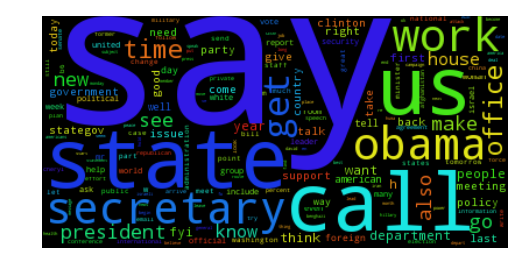

In [17]:
wordcloud = WordCloud().generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")

We can see some differences to the word cloud generated automatically by the library. 

With our text pre-processing pipeline "State" is no longer the most dominant word. It is because we use lemmatization and thus, for example, "say", "said", "saying" is aggreagated in one token "say" and consequently sum of the occurencies of "say", "said", "saying" is bigger the the one of "state". The lemmatization is an advantage of our pipeline in comparison wiht the library's pipeline.

Additionally, the token "Will" disappeared altogether. It is becuase, unlike wordcloud library's pipeline, our pipleine considers it a stopword. Whether this is correct or not is up to a discussion as this way we remove not only future tense auxiliary verb, but also noun "will", adjective "willing" etc. Anyway, wordcloud library uses its own stopword list which might not be comprehensive enough and updated to the current standards. We have decided to turst the stopwords list of nltk library instead.

Another difference is that we have normalized the tokens while the worldcloud library did not. We have put all the tokens into lowercase and removed punctuation from them. This way we get lowercase names which might be considered an disadvantage. On the other hand, we get way more accurate frequencies of the words (even for names, as occasionally people do not capitalize names). The removal of punctuation helped us ot get a more accurate frequency of terms such as "U.S." / "US" / "u.s." / "us". 

## Task 2

> Find all the mentions of world countries in the whole corpus, using the `pycountry` utility (*HINT*: remember that
there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)
Perform sentiment analysis on every email message using the demo methods in the `nltk.sentiment.util` module. Aggregate 
the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level)
that summarizes the perception of the different countries. Repeat the aggregation + plotting steps using different demo
methods from the sentiment analysis module -- can you find substantial differences?